In [1]:
import pandas as pd 
import numpy as np

In [2]:
df=pd.read_csv('weather.csv')

In [3]:
df.shape

(25551, 5)

In [4]:
df.head()

,DATE,PRCP(liquid or ice rain from sky),TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


In [5]:
df.isnull().sum().sort_values(ascending=False)

RAIN                                 3
PRCP(liquid or ice rain from sky)    3
TMIN                                 0
TMAX                                 0
DATE                                 0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop(['DATE'],axis=1,inplace=True)

In [8]:
df['temp']=df['TMAX']+df['TMIN']
rain=df['RAIN']

In [9]:
df.drop(['RAIN','TMAX','TMIN'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
rain=LabelEncoder().fit_transform(rain)

In [11]:
from sklearn.feature_selection import SelectKBest,chi2

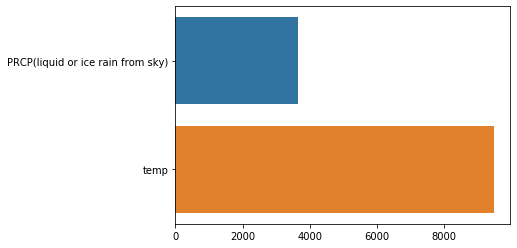

In [12]:
import seaborn as sns
d=SelectKBest(chi2,k='all').fit(df,rain)
sns.barplot(d.scores_,df.columns)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,rain,test_size=0.2,shuffle=True)

In [14]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
lr=LogisticRegression()
rfc=RandomForestClassifier(n_estimators=100)

In [16]:
print('logistic regression')
select_1=RFECV(lr,step=1,cv=5).fit(x_train,y_train)
pd.concat([pd.Series(df.columns),pd.Series(select_1.ranking_),pd.Series(select_1.support_)],axis=1)

logistic regression


,0,1,2
0,PRCP(liquid or ice rain from sky),1,True
1,temp,2,False


In [17]:
lr=lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9156962520794598

In [18]:
y_predict=lr.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict,y_test)

0.9221135029354207

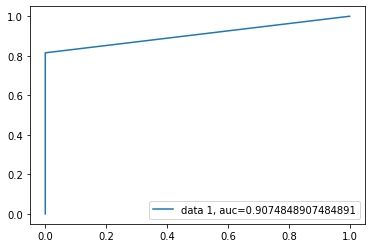

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = metrics.roc_auc_score(y_test, y_predict)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc='best')